# Set the county and subdivision details

In [36]:
# county id
COUNTY_ID = "03"

# county name
COUNTY_NAME = "YELLOWSTONE"

# list of subdivisions to scrape
SUBDIVISIONS = [
    "49ER CONDO PHASE II",
    "3 I'S PATIO HOMES (06)",
    "ALDINGER ACRES SUBD 3RD FILING",
    "ALLISON SUBD",
    "BLUEGRASS SUBD 2ND FILING",
    "BOLLINGER SUBD",
    "BROADACRE SUBD",
    "BUSCHER TOWNHOMES"
    "C&J WEST SUBD"
    "CAMPUS PROFESSIONAL OFFICES"
    "CANYON CREEK INDUSTRIAL TR 2ND",
    "CASA LINDA SUBD",
    "C.B.H. INDUSTRIAL PARK SUBD",
    "C.H.LUND SUBD",
    "YELLOWSTONE ADD",
]

# Instantiate subdivision objects

In [37]:
# initialize the subdivision objects

from data_extractor import Subdivision

subdivision_objects = []
for name in SUBDIVISIONS:
    subdivision_objects.append(Subdivision(name=name, county_id=COUNTY_ID, county_name=COUNTY_NAME))

# Extract list of properties for each subdivision

In [38]:
# fetch all properties for each subdivision
for subdivision in subdivision_objects:
    subdivision.fetch_properties()

url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=49ER CONDO PHASE II&countyid=03 took 8.4 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=3 I'S PATIO HOMES (06)&countyid=03 took 4.11 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=ALDINGER ACRES SUBD 3RD FILING&countyid=03 took 6.31 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=ALLISON SUBD&countyid=03 took 5.39 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=BLUEGRASS SUBD 2ND FILING&countyid=03 took 4.59 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=BOLLINGER SUBD&countyid=03 took 6.37 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=BROADACRE SUBD&countyid=03 took 5.87 seconds
url: https://svc.mt.gov/msl/legacycadastralapi

# Aggregate properties from all subdivisions in a single list

In [39]:
# extract property details from the property html

from data_extractor import PropertyExtractor

initial_property_data_list = []

for subdivision in subdivision_objects:
    property_extractor = PropertyExtractor(subdivision.properties_html)
    initial_property_data_list.extend(property_extractor.extract_properties())

# Save the initial property data to a csv file

In [59]:
import pandas as pd

# initialize a dataframe with the initial property data
initial_df = pd.DataFrame(initial_property_data_list)

# save initial property data to a csv file
initial_df.to_csv("initial_property_data.csv", index=False)

# output the df
initial_df

,Owner Name,Geocode,Address,Legal Description
0,49'ER CONDOMINIUM PHASE II THE,03-1033-21-1-10-34-7000,"PROSPECTORS LN BILLINGS, MT 59105","49ER CONDO PHASE II, S21, T01 N, R26 E, MASTER..."
1,"AUS, GORDON & KARLA",03-1033-21-1-10-34-7001,"201 PROSPECTORS LN BILLINGS, MT 59105","49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2..."
2,"AUS, GORDON & KARLA",03-1033-21-1-10-34-7002,"203 PROSPECTORS LN BILLINGS, MT 59105","49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2..."
3,"AUS, GORDON & KARLA",03-1033-21-1-10-34-7004,"207 PROSPECTORS LN BILLINGS, MT 59105","49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2..."
4,"AUS, GORDON A & KARLA R",03-1033-21-1-10-34-7003,"205 PROSPECTORS LN BILLINGS, MT 59105","49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2..."
...,...,...,...,...
544,"WOOD, HEIDI E & SARA B",03-0927-04-3-11-06-0000,"521 COOK AVE BILLINGS, MT 59102","YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 18, ..."
545,"YELLE, HAROLD N JR & NANCY A",03-0927-04-3-09-06-0000,"727 COOK AVE BILLINGS, MT 59102","YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 20, ..."
546,YELLOWSTONE COUNTY,03-0927-04-3-11-08-0000,"COOK AVE BILLINGS, MT 59101","YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 18, ..."
547,"YOUNG, VIVIAN M",03-0927-04-3-28-19-0000,"430 BROADWATER AVE BILLINGS, MT 59102","YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 1, L..."


# Analyze the initial property data

In [61]:
# Convert the data into a pandas DataFrame again
df = pd.DataFrame(initial_property_data_list)

# Compute summary statistics for each API call's response time
summary_stats = df.describe().transpose()

summary_stats

,count,unique,top,freq
Owner Name,549,500,"SAUNDERS, RANDAL KENNETH",9
Geocode,549,549,03-1033-21-1-10-34-7000,1
Address,549,534,No Data,11
Legal Description,549,549,"49ER CONDO PHASE II, S21, T01 N, R26 E, MASTER...",1


# Fetch Complete Property Data

In [41]:
from models import Property
from data_extractor import PropertyHTML

# initialize lists of data frames to hold the property data and time it takes to fetch all data
complete_property_data_list = []
times = []

# for each property in each subdivision
for property in initial_property_data_list:
    # fetch the property geocode
    geocode = property["Geocode"]

    # initialize the propertyhtml object
    property_html = PropertyHTML(geocode)

    # fetch all html content for the property
    property_html.fetch_all_data()

    # add the time_taken by each property to the list
    times.append(property_html.time_taken())

    # initialize the property object
    property_object = Property()
    property_object.populate_from_property_html_object(property_html)

    # add property details to the list
    complete_property_data_list.append(property_object.json())

url: https://svc.mt.gov/msl/legacycadastralapi/summary/getsummarydata?geocode=03-1033-21-1-10-34-7000&year=2023 took 1.18 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/owner/getownerdata?geocode=03-1033-21-1-10-34-7000&year=2023 took 0.98 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/appraisal/getappraisaldata?geocode=03-1033-21-1-10-34-7000&year=2023 took 0.99 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/marketland/getmarketlanddata?geocode=03-1033-21-1-10-34-7000&year=2023 took 0.97 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/dwelling/getdwellingdata?geocode=03-1033-21-1-10-34-7000&year=2023 took 0.98 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/otherbuilding/getotherbuildingdata?geocode=03-1033-21-1-10-34-7000&year=2023 took 1.28 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/commercial/getcommercialdata?geocode=03-1033-21-1-10-34-7000&year=2023 took 1.0 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/agforest/getagfore

In [42]:
# initialize a dataframe with the complete property data
complete_df = pd.DataFrame(complete_property_data_list)

# store as csv
complete_df.to_csv("complete_property_data.csv", index=False)

# output the df
complete_df

,geocode,legal_description,total_market_land,last_modified,property_address,sub_category,subdivision,owners,land_value,building_value,yoY_difference,building_details,other_building_details,market_land_details
0,03-1033-21-1-10-34-7000,"49ER CONDO PHASE II, S21, T01 N, R26 E, MASTER...",0.298,10/6/2023 1:55:41 AM,None,Condo/Townhouse Master,49ER CONDO PHASE II,"[{'': '201 PROSPECTORS LN', 'Ownership %:': '1...",100318,0,29167,[],[{}],"[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
1,03-1033-21-1-10-34-7001,"49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2...",0.033,10/6/2023 1:55:41 AM,None,Residential Property,49ER CONDO PHASE II,"[{'': '3791 HIGHWAY 5 W', 'Ownership %:': '100...",49182,154818,69800,[],"[{'Type': 'Residential', 'Description': 'RPA2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
2,03-1033-21-1-10-34-7002,"49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2...",0.033,10/6/2023 1:55:41 AM,None,Residential Property,49ER CONDO PHASE II,"[{'': '3791 HIGHWAY 5 W', 'Ownership %:': '100...",49182,154818,69800,[],"[{'Type': 'Residential', 'Description': 'RPA2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
3,03-1033-21-1-10-34-7004,"49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2...",0.033,10/6/2023 1:55:41 AM,None,Residential Property,49ER CONDO PHASE II,"[{'': '3791 HIGHWAY 5 W', 'Ownership %:': '100...",49182,154818,69800,[],"[{'Type': 'Residential', 'Description': 'RPA2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
4,03-1033-21-1-10-34-7003,"49ER CONDO PHASE II, S21, T01 N, R26 E, UNIT 2...",0.033,10/6/2023 1:55:41 AM,None,Residential Property,49ER CONDO PHASE II,"[{'': '3791 HIGHWAY 5 W', 'Ownership %:': '100...",49182,154818,69800,[],"[{'Type': 'Residential', 'Description': 'RPA2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,03-0927-04-3-11-06-0000,"YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 18, ...",0.161,10/6/2023 1:55:41 AM,None,Residential Property,YELLOWSTONE ADD,"[{'': '521 COOK AVE', 'Ownership %:': '100', '...",37300,235000,62800,[],"[{'Type': 'Residential', 'Description': 'RRS1 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
545,03-0927-04-3-09-06-0000,"YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 20, ...",0.121,10/6/2023 1:55:41 AM,None,Residential Property,YELLOWSTONE ADD,"[{'': '727 COOK AVE', 'Ownership %:': '100', '...",34912,176488,44100,[],"[{'Type': 'Residential', 'Description': 'RRG3 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
546,03-0927-04-3-11-08-0000,"YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 18, ...",0.012,10/6/2023 1:55:41 AM,None,Government Property,YELLOWSTONE ADD,"[{'': 'YELLOWSTONE COUNTY FINANCE', 'Ownership...",4908,0,-2526,[],[{}],"[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
547,03-0927-04-3-28-19-0000,"YELLOWSTONE ADD, S04, T01 S, R26 E, BLOCK 1, L...",0.161,10/6/2023 1:55:41 AM,None,Residential Property,YELLOWSTONE ADD,"[{'': '430 BROADWATER AVE', 'Ownership %:': '1...",37300,127100,35300,[],"[{'Type': 'Residential', 'Description': 'RRS2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."


# Analyze the Complete Property Data

In [62]:
# Convert the data into a pandas DataFrame again
df = pd.DataFrame(complete_property_data_list)

# Compute summary statistics for each API call's response time
summary_stats = df.describe().transpose()

summary_stats

,count,mean,std,min,25%,50%,75%,max
land_value,549.0,52325.391621,85457.952957,0.0,37300.0,37300.0,42739.0,1712191.0
building_value,549.0,223003.038251,217796.444288,0.0,166488.0,192700.0,230600.0,3168940.0
yoY_difference,549.0,56536.036430,43532.246105,-96071.0,41000.0,53196.0,66000.0,649856.0


# Plot the distribution of response times for each API call

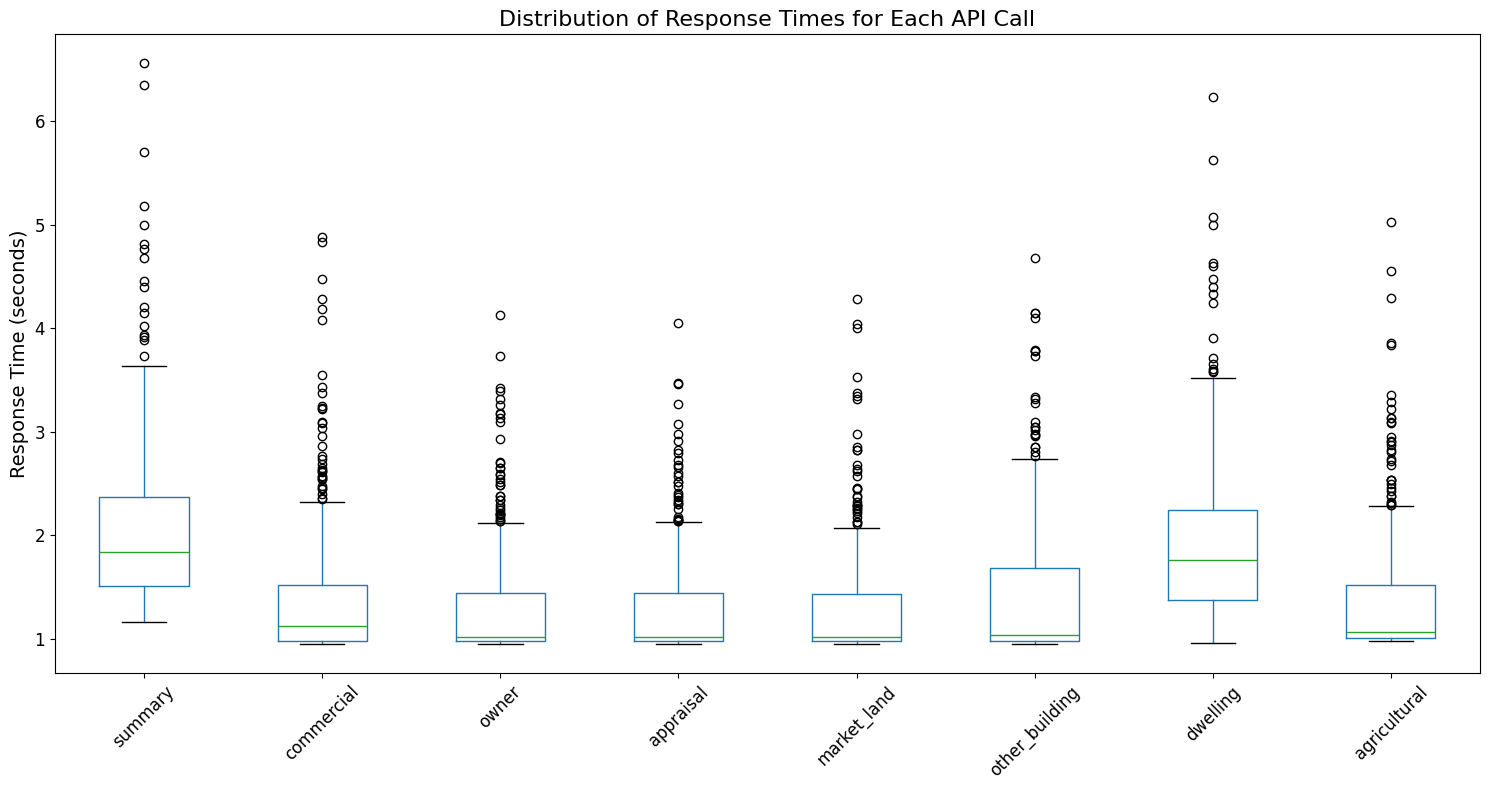

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the data into a pandas DataFrame
df = pd.DataFrame(times)

# Drop the 'Geocode' column as it's not needed for the visualization
df = df.drop(columns='Geocode')

# Create a box plot
plt.figure(figsize=(15, 8))
df.boxplot(grid=False, vert=True, fontsize=12)
plt.ylabel('Response Time (seconds)', fontsize=14)
plt.title('Distribution of Response Times for Each API Call', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the average response time for each API call

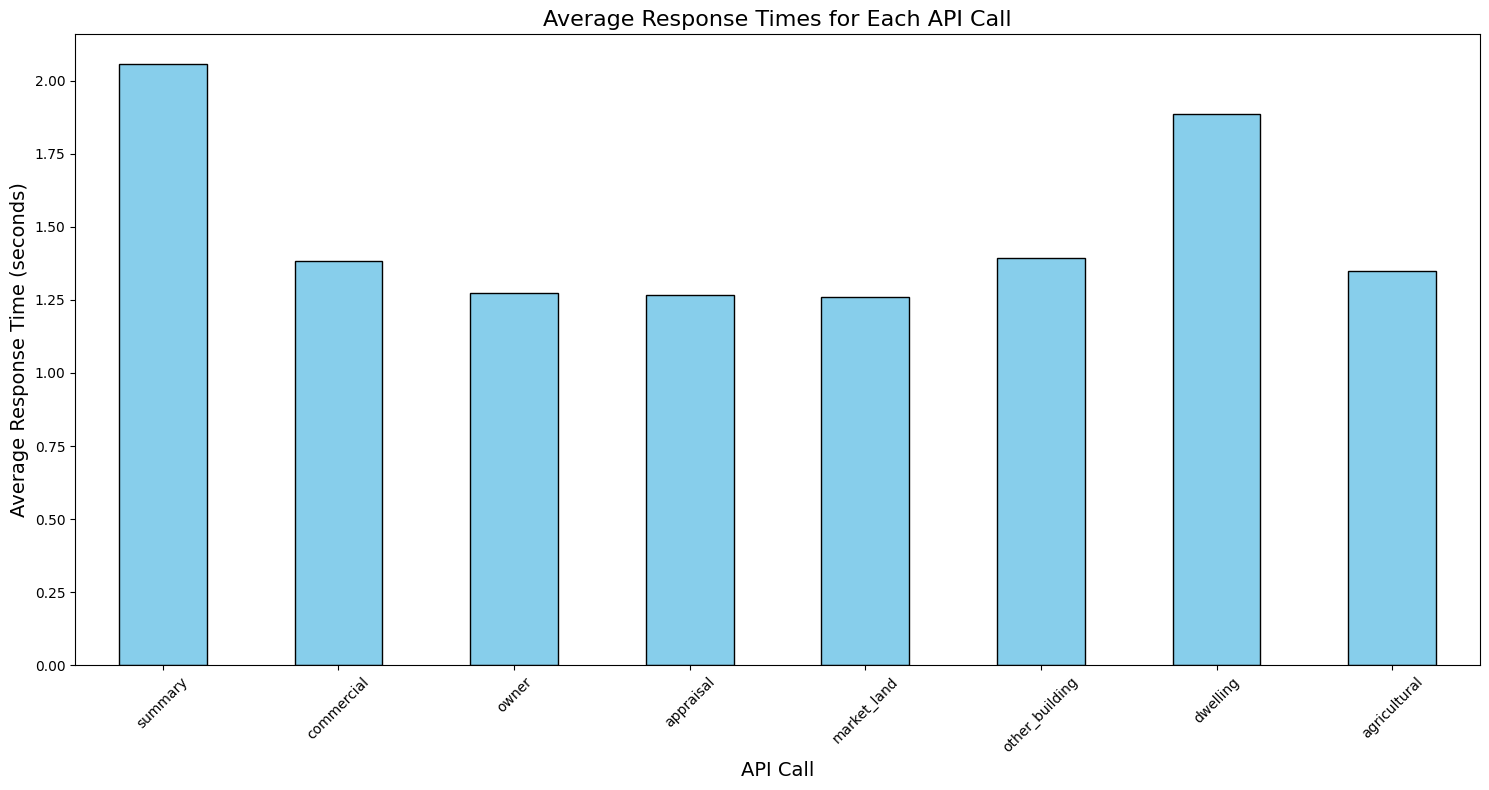

In [101]:
# Calculate the average response time for each API call
average_response_times = df.mean()

# Create a bar chart
plt.figure(figsize=(15, 8))
average_response_times.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Average Response Time (seconds)', fontsize=14)
plt.xlabel('API Call', fontsize=14)
plt.title('Average Response Times for Each API Call', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms

To understand the frequency distribution of response times for each api call.

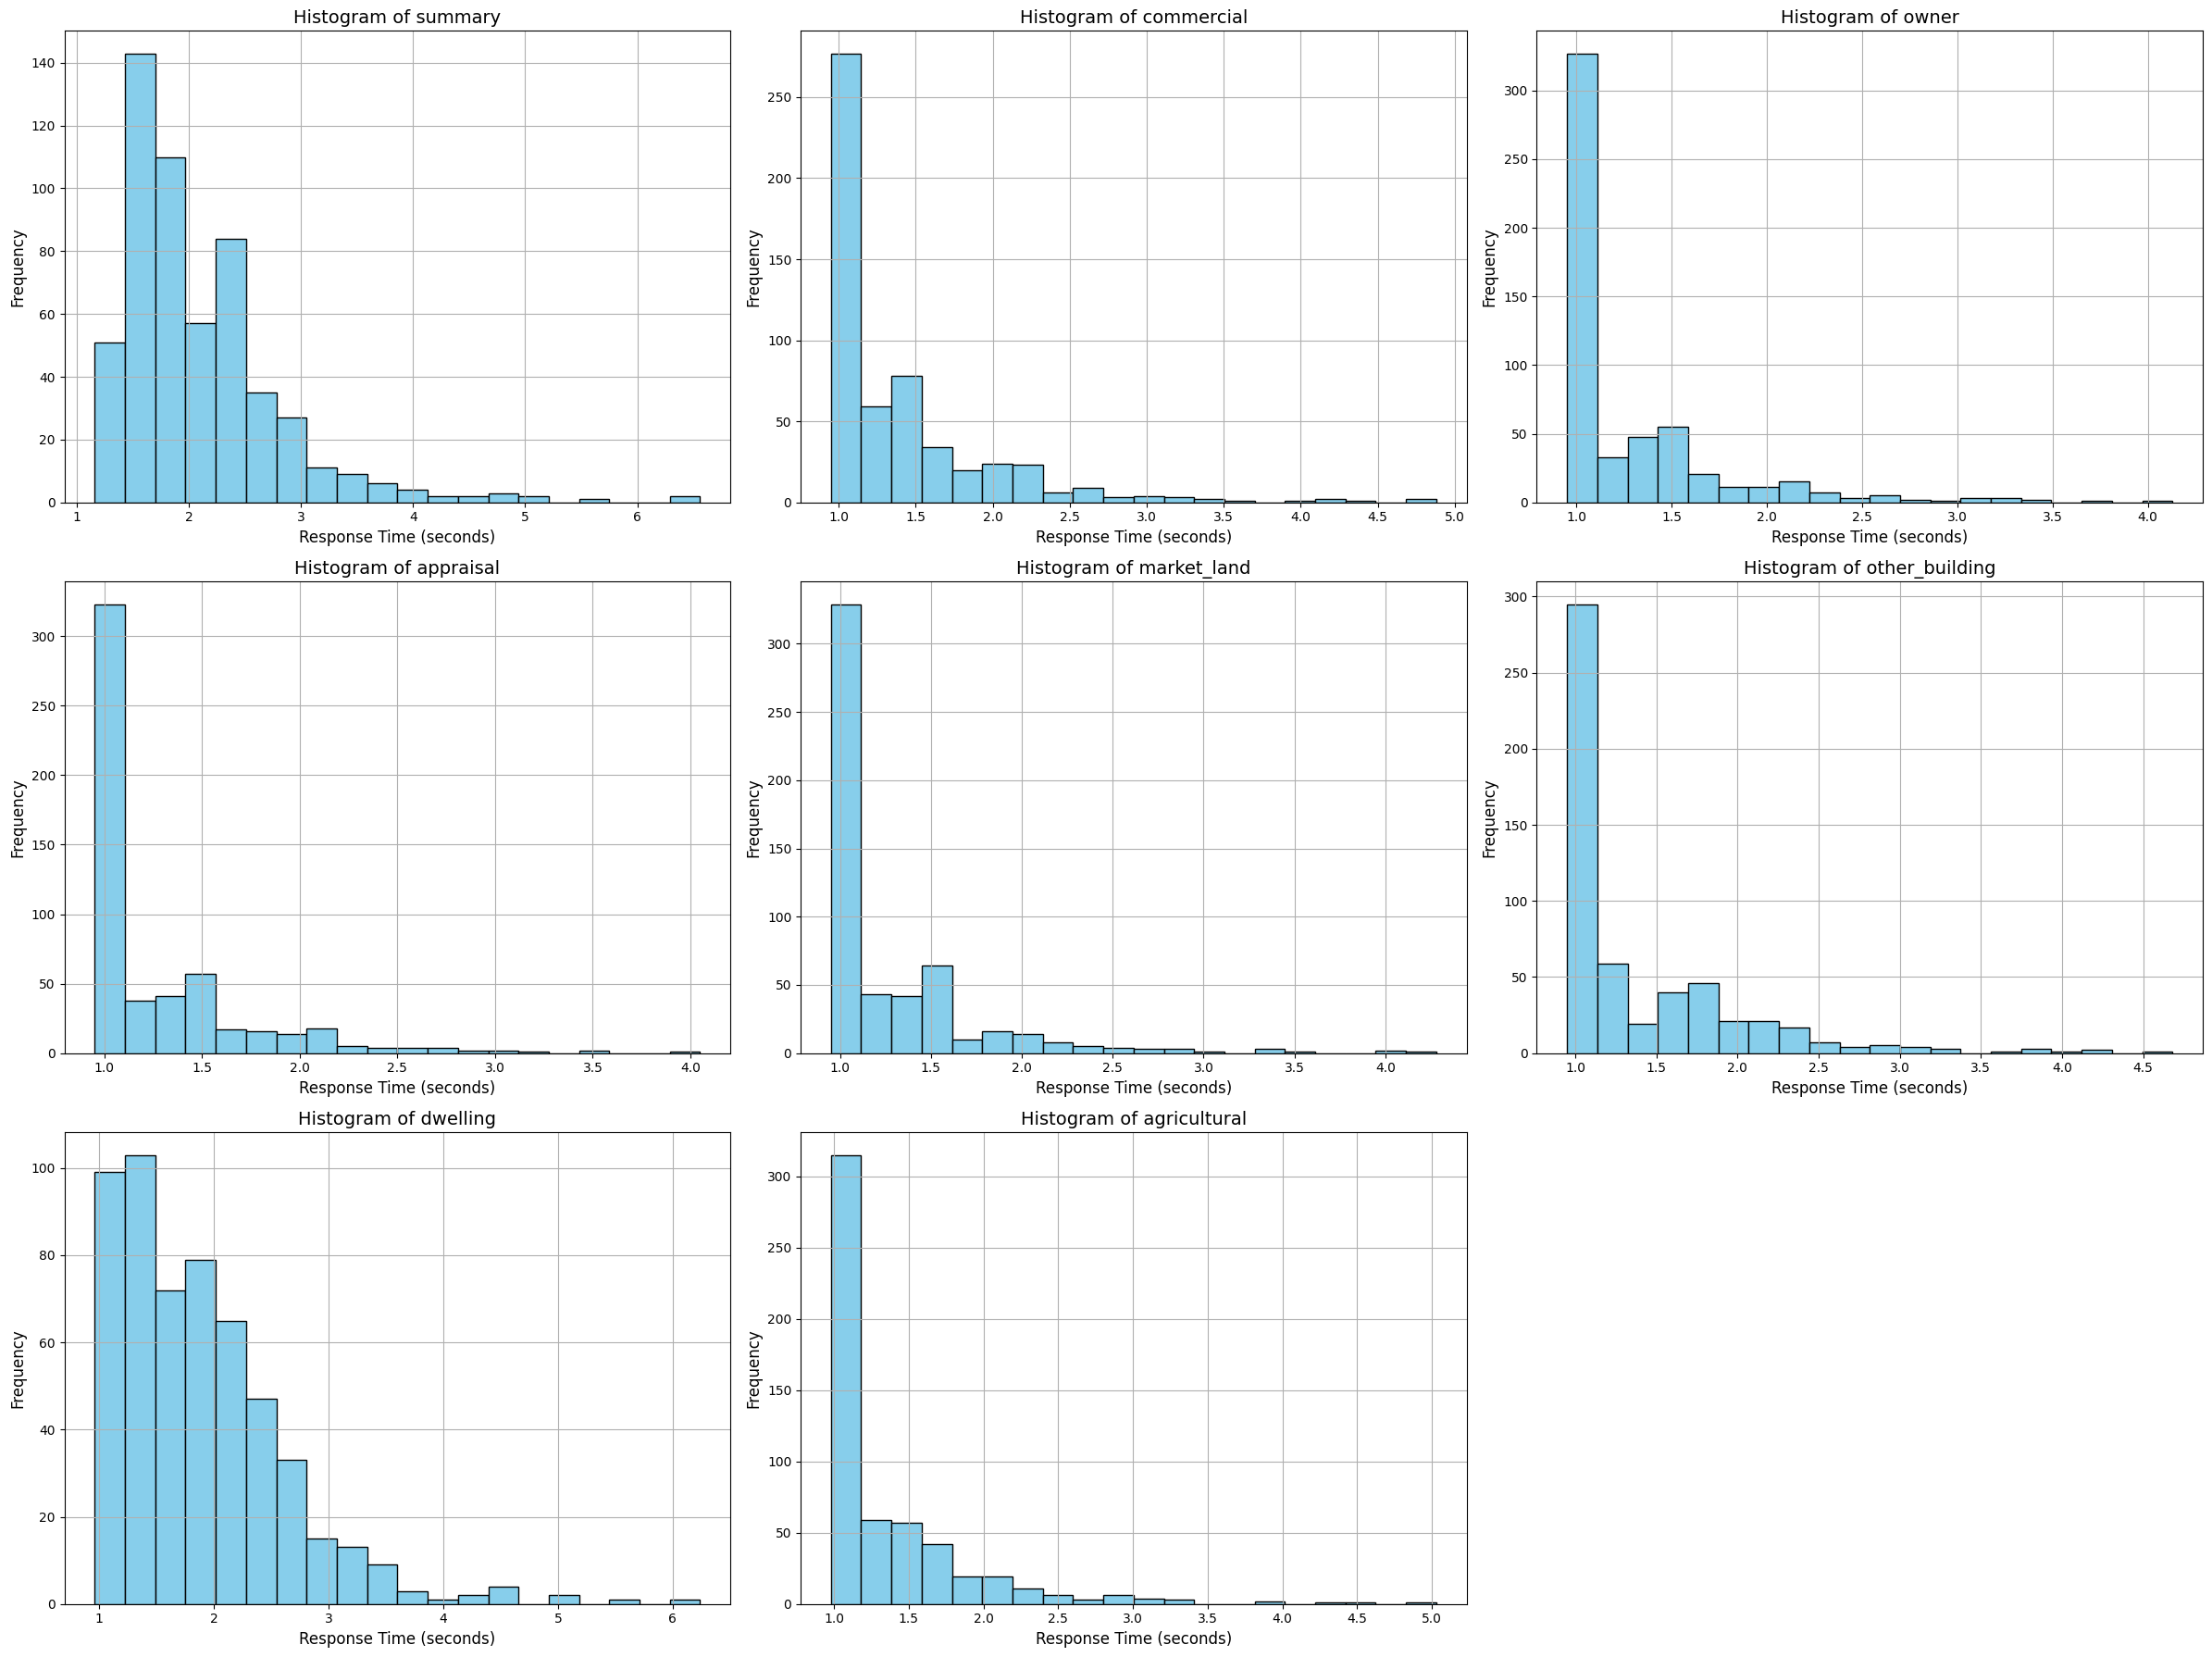

In [102]:
# Plot histograms for each API call
plt.figure(figsize=(24, 18))

# Loop through columns and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[column].hist(bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel('Response Time (seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation heatmap

To check if response times of certain API calls are correlated with others.




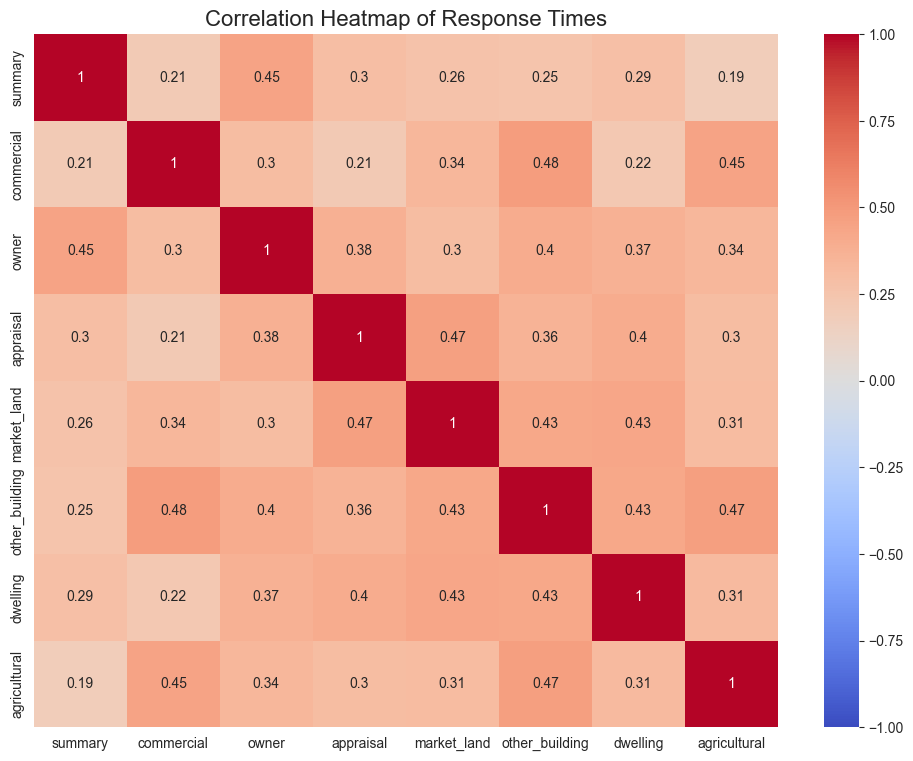

In [103]:
import seaborn as sns
# Setting the Seaborn theme
sns.set_style("whitegrid")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Response Times', fontsize=16)
plt.show()

# Time series analysis

Provided we have timestamp data (we don't have this in the current dataset)

In [104]:
# TODO: Add time series analysis

# Density Plots:
These will show the distribution of response times for each API call, offering a smoothed version of the histogram.

1. Peaks in the density plot indicate common response times.
2. The width of the distribution gives an idea about the variability of the response times.

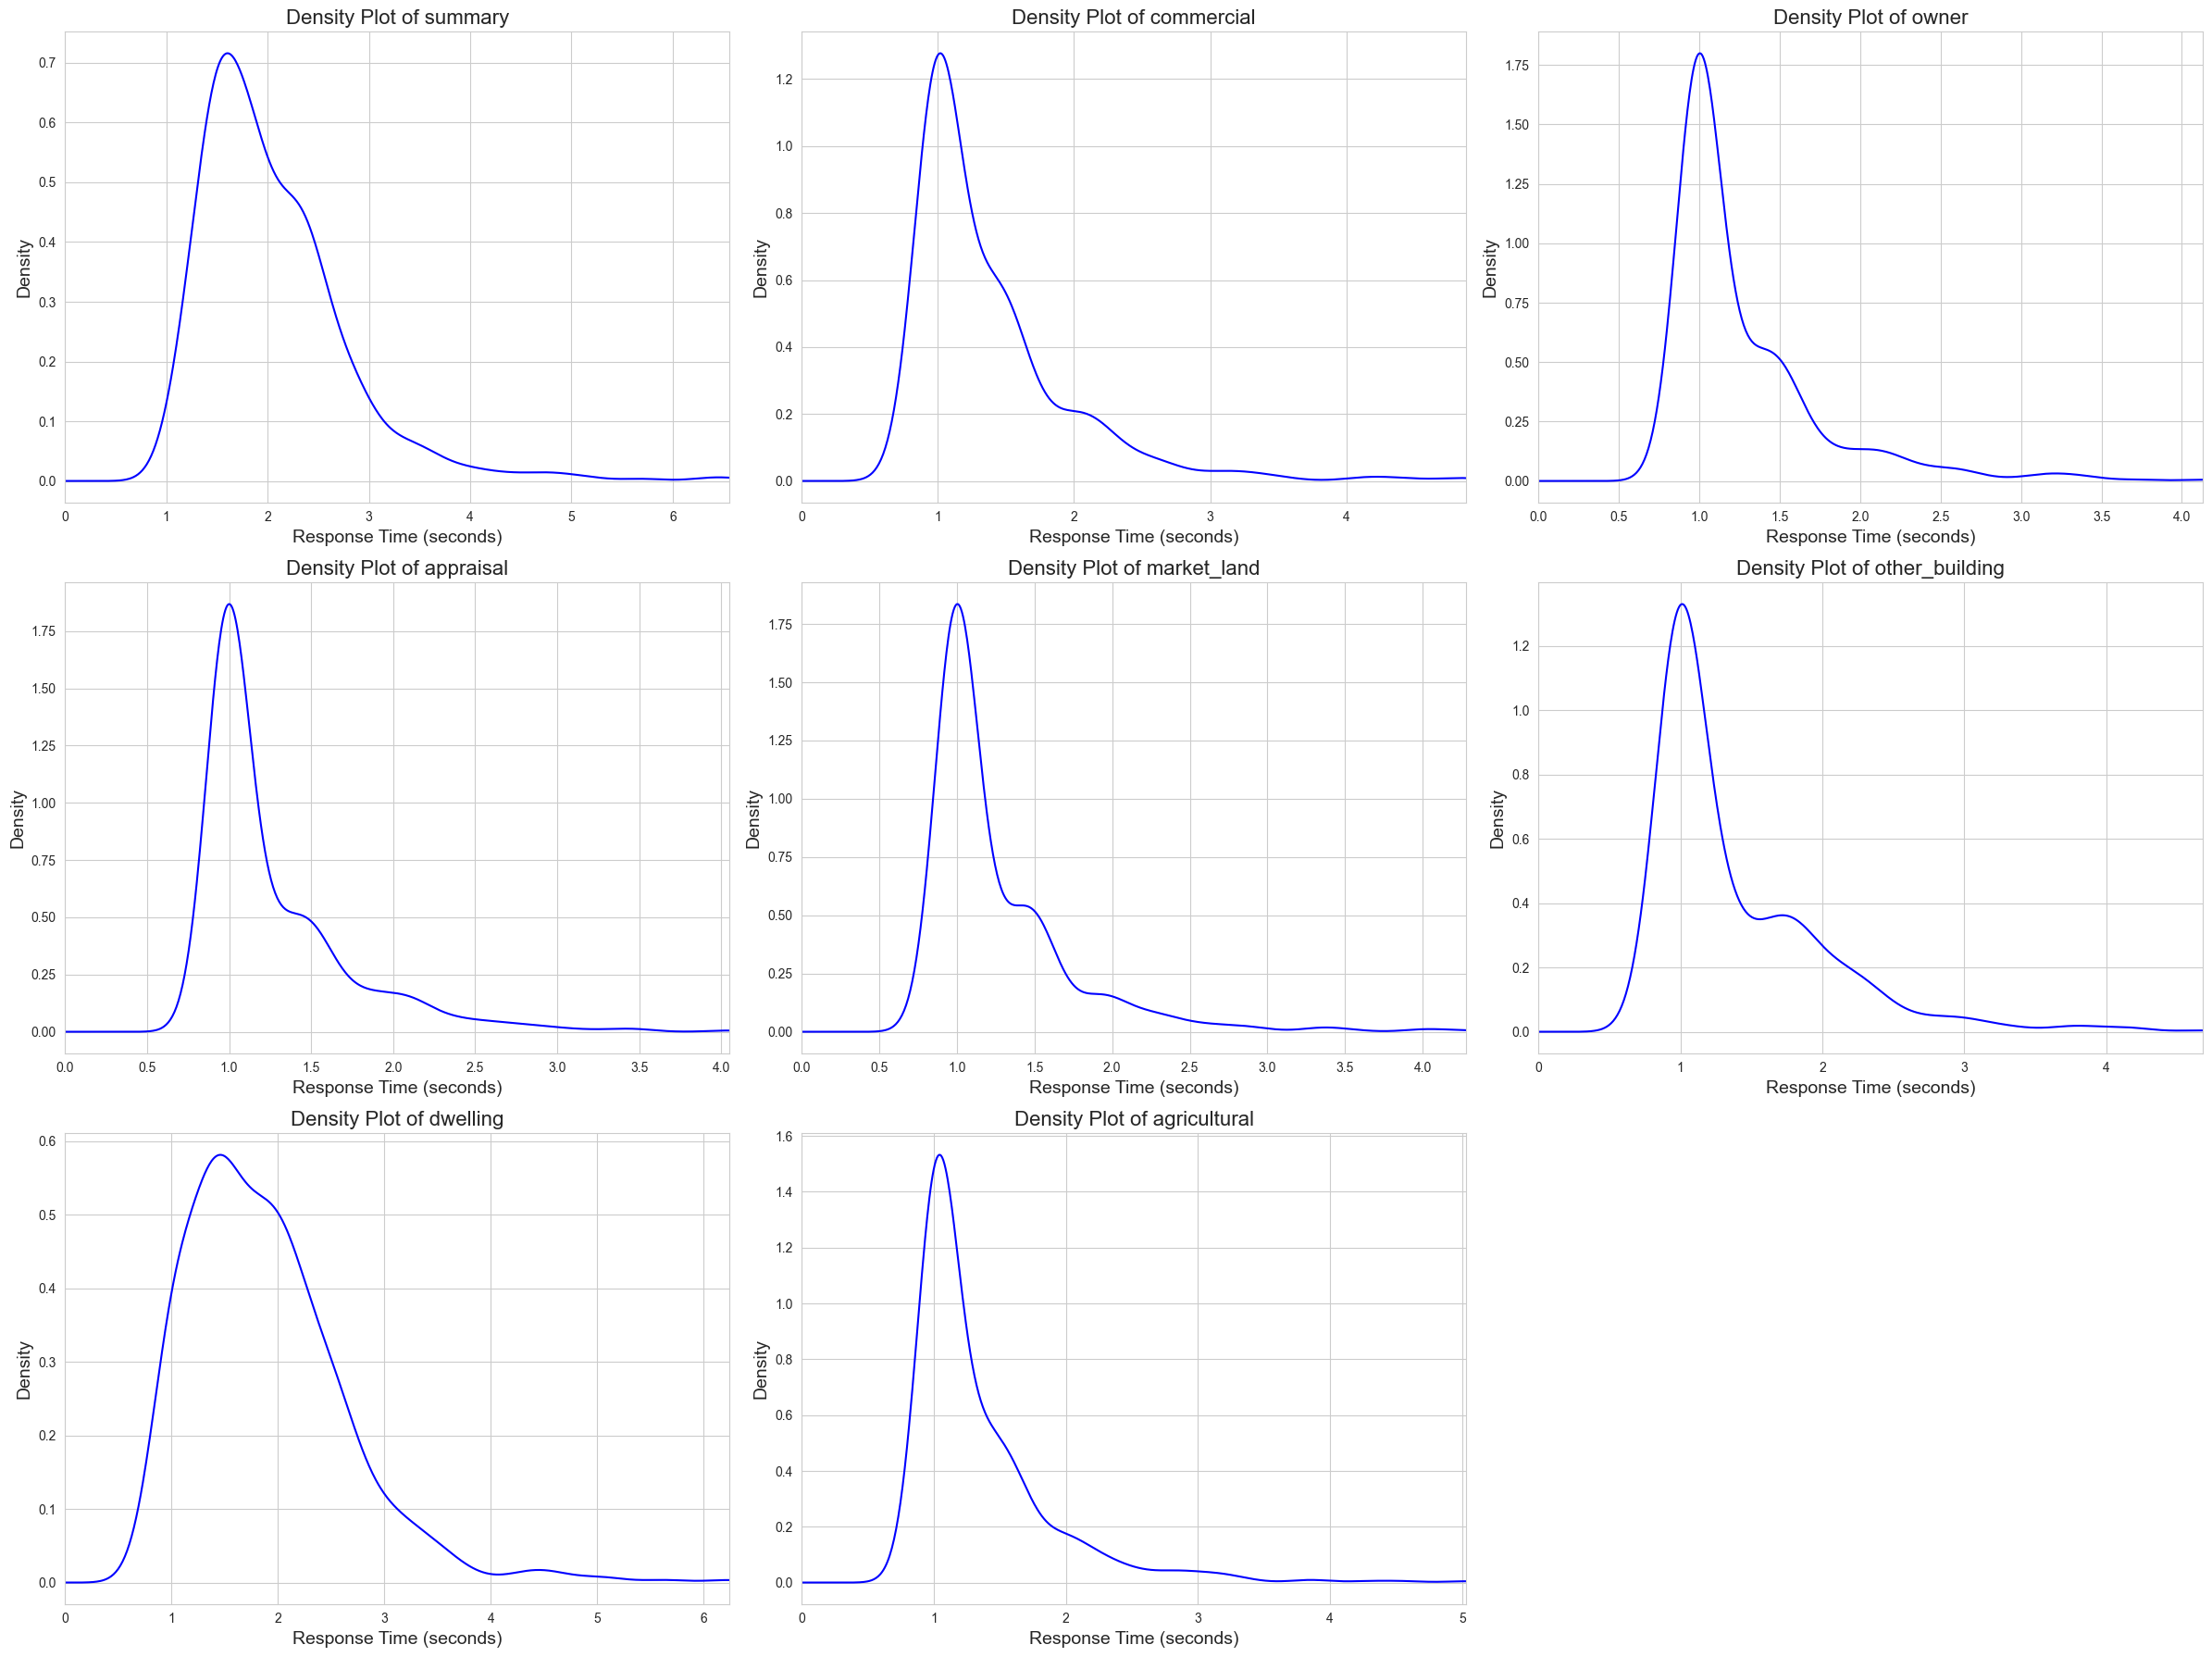

In [105]:
# density plots with x-axis starting at 0
plt.figure(figsize=(24, 18))

# Loop through columns and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[column].plot(kind='density', color='blue')
    plt.xlim(0, df[column].max())  # Set x-axis to start at 0
    plt.title(f'Density Plot of {column}', fontsize=16)
    plt.xlabel('Response Time (seconds)', fontsize=14)
    plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

# Violin Plots:

These combine aspects of box plots and density plots, showcasing the distribution of the response times more clearly.


1. The white dot represents the median.
2. The thick bar in the center represents the interquartile range.
3. The thin line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
4. The width of the plot at different values indicates the density of the data at that value, with wider sections representing higher density (more data points).
5. From the violin plots, we can observe the distribution and variability of response times for each API call more clearly.

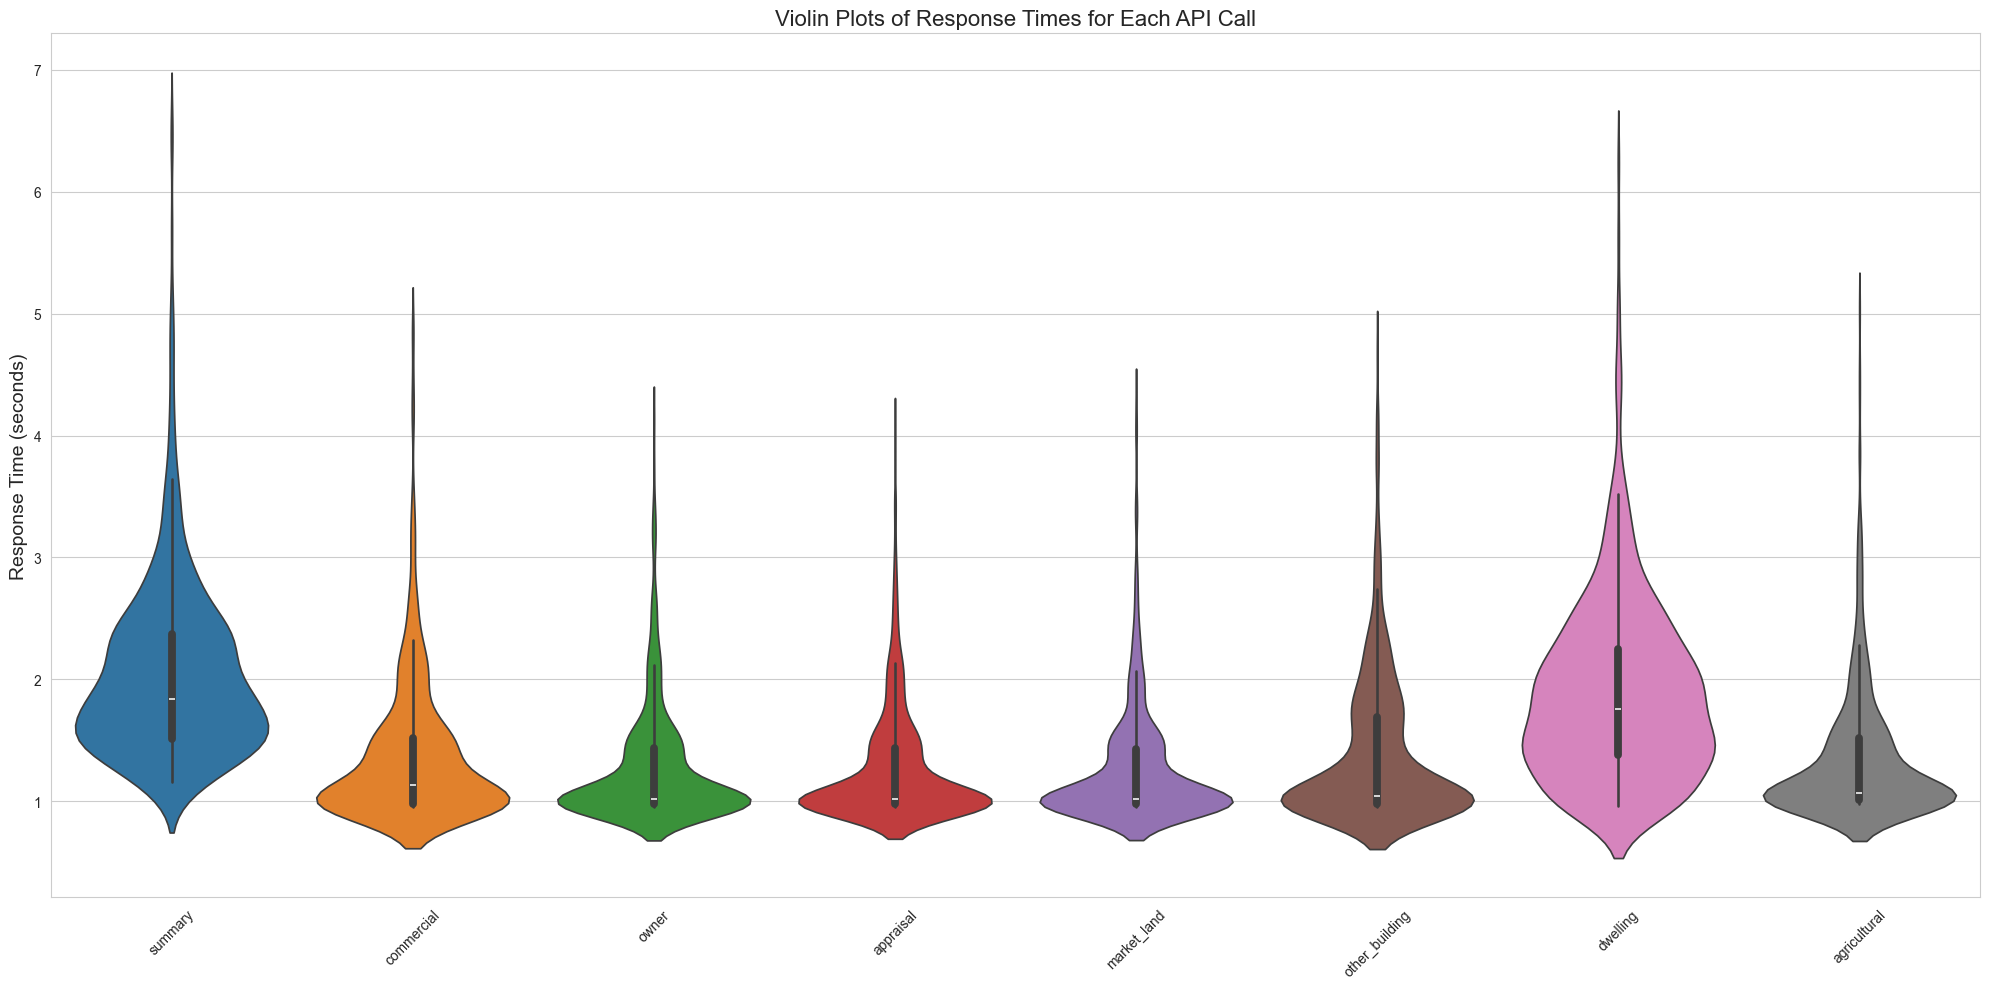

In [106]:
# Plot violin plots for each API call
plt.figure(figsize=(20, 10))
sns.violinplot(data=df)
plt.ylabel('Response Time (seconds)', fontsize=14)
plt.title('Violin Plots of Response Times for Each API Call', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cumulative Distribution Function (CDF) Plots:

These show the probability that a response time will be less than or equal to a particular value. It can be useful to understand what percentage of calls complete within a certain time frame.


1. The y-axis represents the probability that a response time will be less than or equal to the value on the x-axis.
2. For example, looking at the summary plot, you can determine the probability (percentage) that a response time will be less than a particular number of seconds.
3. The steeper sections of the plot indicate where most of the data is concentrated.

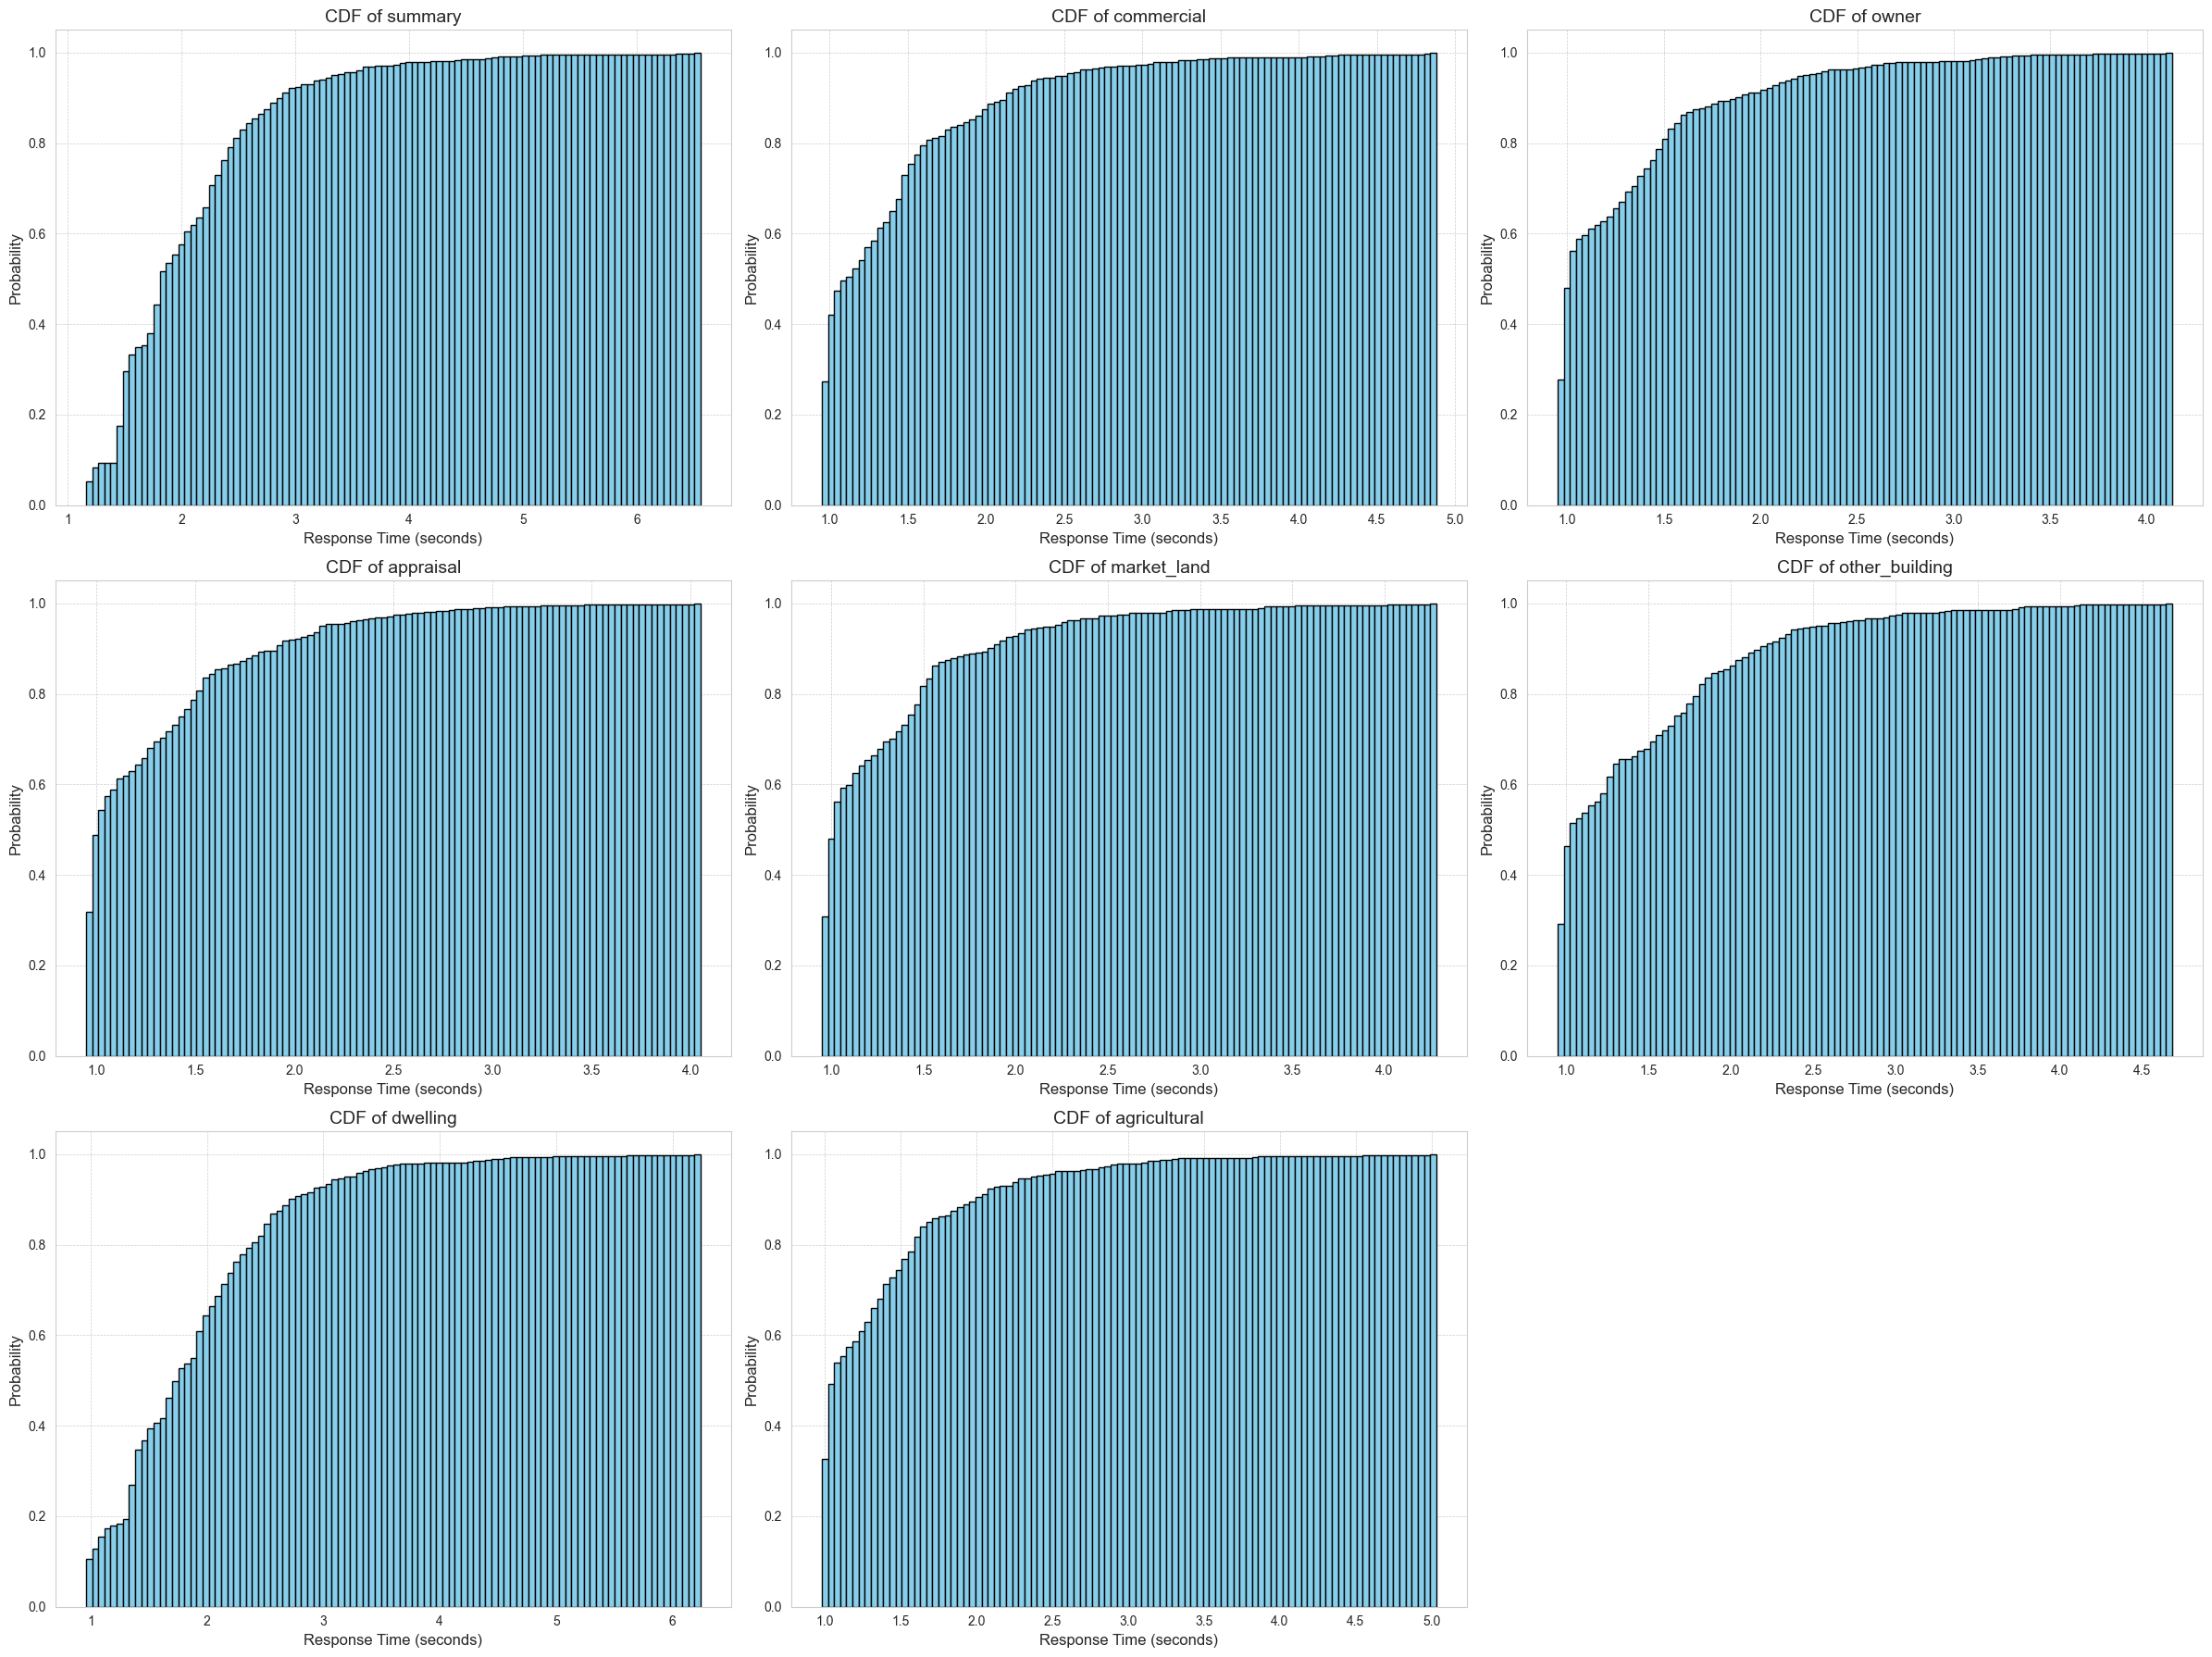

In [107]:
# Plot CDF for each API call
plt.figure(figsize=(24, 18))

# Loop through columns and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[column].hist(cumulative=True, density=1, bins=100, color='skyblue', edgecolor='black')
    plt.title(f'CDF of {column}', fontsize=14)
    plt.xlabel('Response Time (seconds)', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Response Time by GEO Codes

In [108]:
df_copy = pd.DataFrame(times)
total_time_by_geocode = pd.DataFrame(times)
total_time_by_geocode['total_time'] = total_time_by_geocode.drop(columns='Geocode').sum(axis=1)
total_time_by_geocode.head()

,Geocode,summary,commercial,owner,appraisal,market_land,other_building,dwelling,agricultural,total_time
0,03-1033-21-1-10-34-7000,1.18,1.00,0.98,1.00,0.97,1.28,0.98,1.01,8.40
1,03-1033-21-1-10-34-7001,1.21,0.99,1.00,0.99,0.98,1.02,1.14,1.06,8.39
2,03-1033-21-1-10-34-7002,1.77,2.02,1.55,1.56,0.98,1.20,1.44,2.04,12.56
3,03-1033-21-1-10-34-7004,1.91,0.97,1.25,0.97,1.03,1.76,1.87,1.03,10.79
4,03-1033-21-1-10-34-7003,1.58,1.27,1.00,1.02,1.20,2.77,1.10,1.77,11.71


# Analyze the total response time by geocode

In [109]:
total_time_by_geocode.describe()

,summary,commercial,owner,appraisal,market_land,other_building,dwelling,agricultural,total_time
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,2.055956,1.381658,1.272914,1.265993,1.261184,1.393497,1.885865,1.347523,11.864590
std,0.735468,0.592812,0.479005,0.455583,0.474548,0.604567,0.752340,0.540269,3.020184
min,1.160000,0.950000,0.950000,0.950000,0.950000,0.950000,0.960000,0.980000,8.050000
25%,1.510000,0.980000,0.980000,0.980000,0.980000,0.980000,1.380000,1.010000,9.960000
50%,1.840000,1.130000,1.020000,1.020000,1.020000,1.040000,1.760000,1.070000,11.260000
75%,2.370000,1.520000,1.440000,1.440000,1.430000,1.690000,2.250000,1.520000,12.780000
max,6.560000,4.880000,4.130000,4.050000,4.280000,4.680000,6.240000,5.030000,34.840000


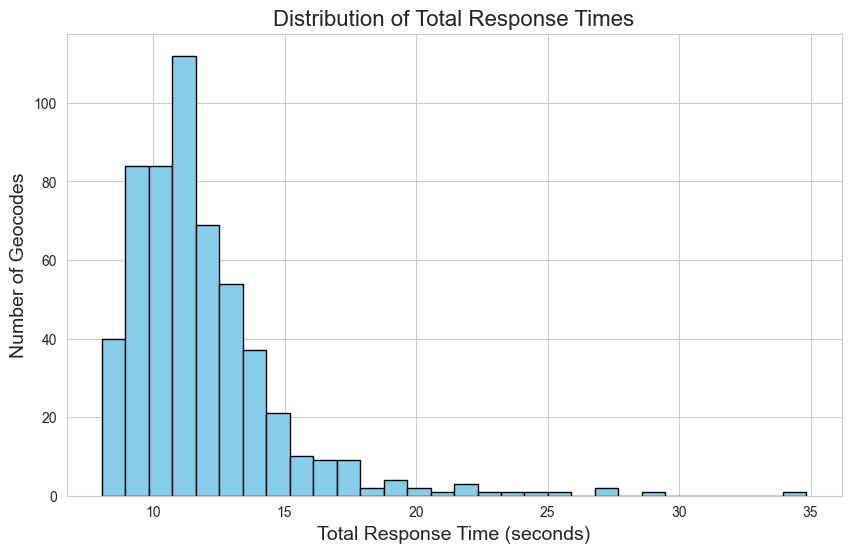

In [110]:
# Histogram for distribution of total response times across all geocodes
plt.figure(figsize=(10, 6))

total_time_by_geocode['total_time'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Response Times', fontsize=16)
plt.xlabel('Total Response Time (seconds)', fontsize=14)
plt.ylabel('Number of Geocodes', fontsize=14)

plt.show()


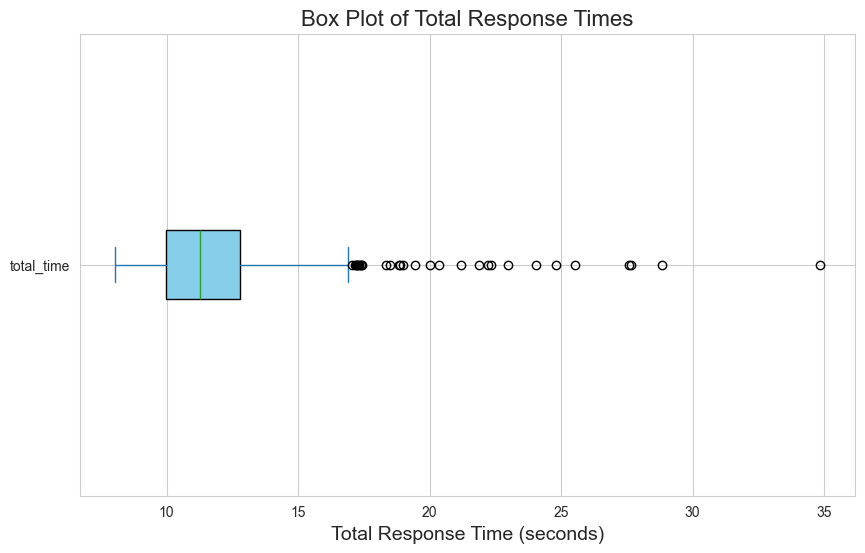

In [111]:
# Box plot for total response times across all geocodes
plt.figure(figsize=(10, 6))

total_time_by_geocode['total_time'].plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Total Response Times', fontsize=16)
plt.xlabel('Total Response Time (seconds)', fontsize=14)

plt.show()

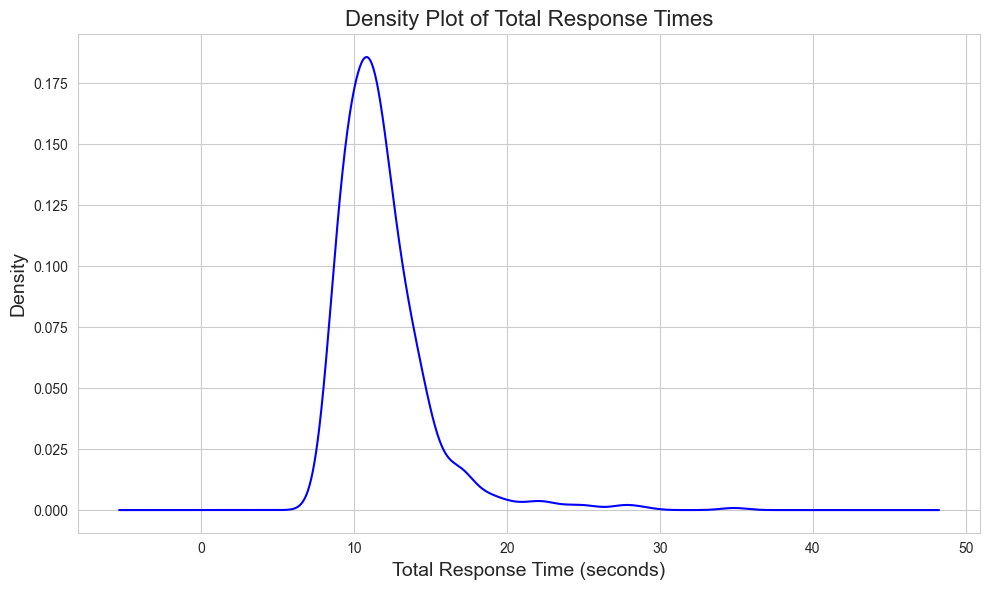

In [112]:
# Density plot for the distribution of total response times across all geocodes
plt.figure(figsize=(10, 6))

total_time_by_geocode['total_time'].plot(kind='density', color='blue')
plt.title('Density Plot of Total Response Times', fontsize=16)
plt.xlabel('Total Response Time (seconds)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

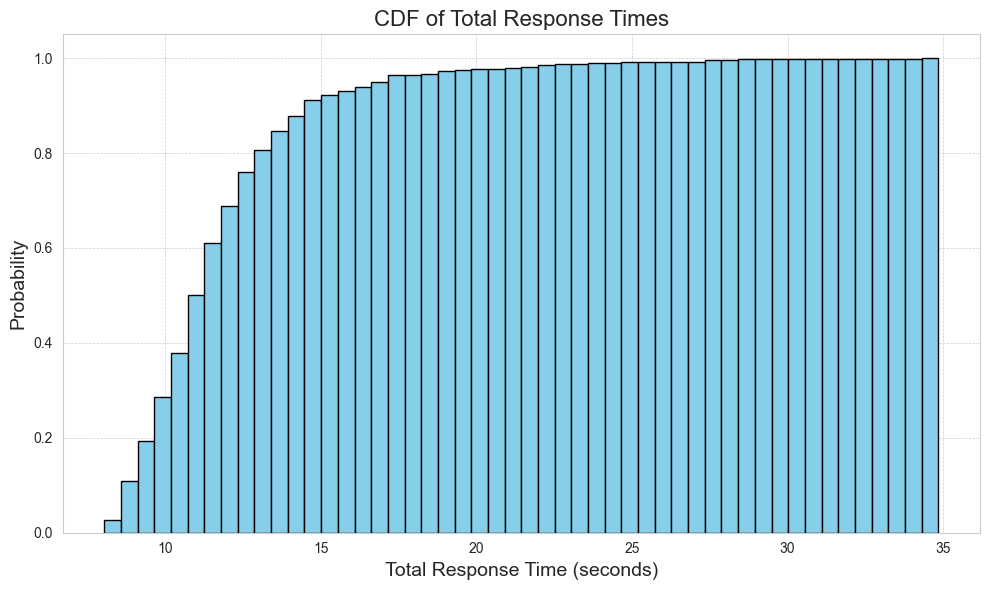

In [113]:
# CDF plot for the distribution of total response times across all geocodes
plt.figure(figsize=(10, 6))

total_time_by_geocode['total_time'].hist(cumulative=True, density=1, bins=50, color='skyblue', edgecolor='black')
plt.title('CDF of Total Response Times', fontsize=16)
plt.xlabel('Total Response Time (seconds)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

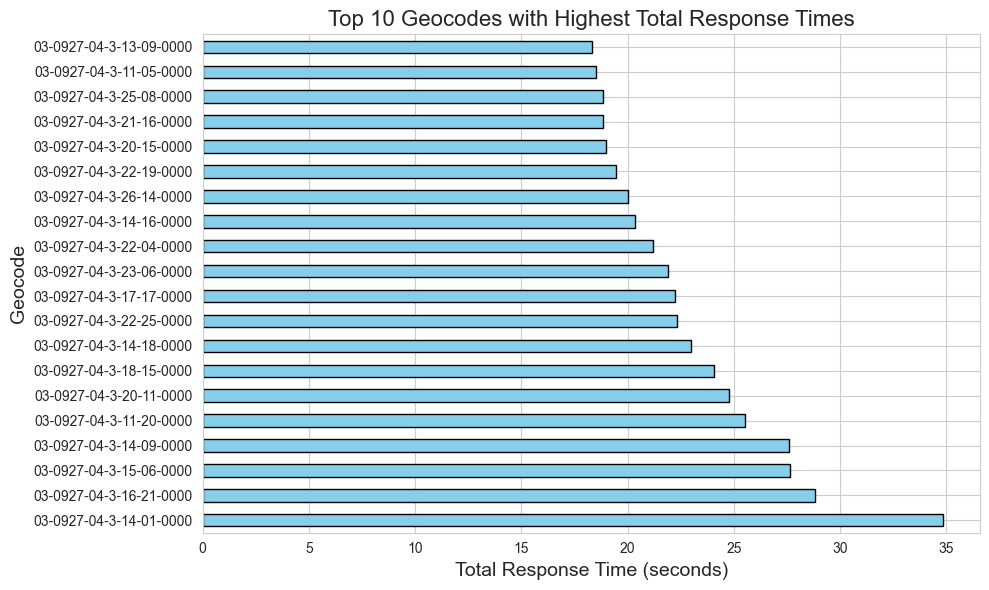

In [114]:
# Top 20 geocodes with highest total response times
top_20_geocodes = total_time_by_geocode.nlargest(20, 'total_time')

plt.figure(figsize=(10, 6))
top_20_geocodes.set_index('Geocode')['total_time'].plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Geocodes with Highest Total Response Times', fontsize=16)
plt.xlabel('Total Response Time (seconds)', fontsize=14)
plt.ylabel('Geocode', fontsize=14)

plt.tight_layout()
plt.show()

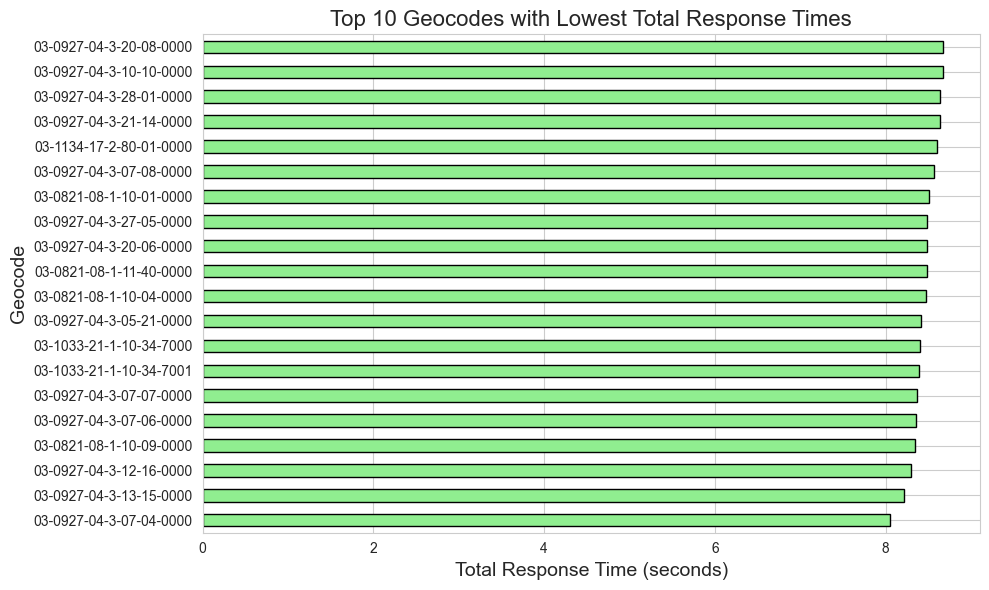

In [115]:
# Top 20 geocodes with lowest total response times
bottom_20_geocodes = total_time_by_geocode.nsmallest(20, 'total_time')

plt.figure(figsize=(10, 6))
bottom_20_geocodes.set_index('Geocode')['total_time'].plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Top 10 Geocodes with Lowest Total Response Times', fontsize=16)
plt.xlabel('Total Response Time (seconds)', fontsize=14)
plt.ylabel('Geocode', fontsize=14)

plt.tight_layout()
plt.show()

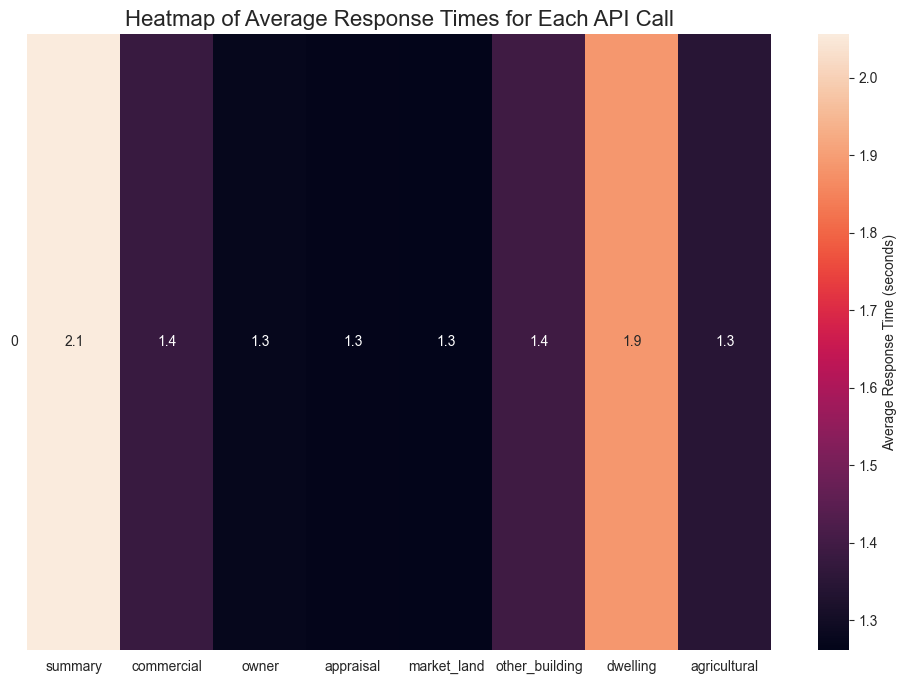

In [120]:
# Heatmap of average response times for each API call
plt.figure(figsize=(12, 8))
avg_response_times = total_time_by_geocode.drop(columns=['Geocode', 'total_time']).mean()
sns.heatmap(avg_response_times.to_frame().transpose(), annot=True, cbar_kws={'label': 'Average Response Time (seconds)'})
plt.title('Heatmap of Average Response Times for Each API Call', fontsize=16)
plt.yticks(rotation=0)
plt.show()

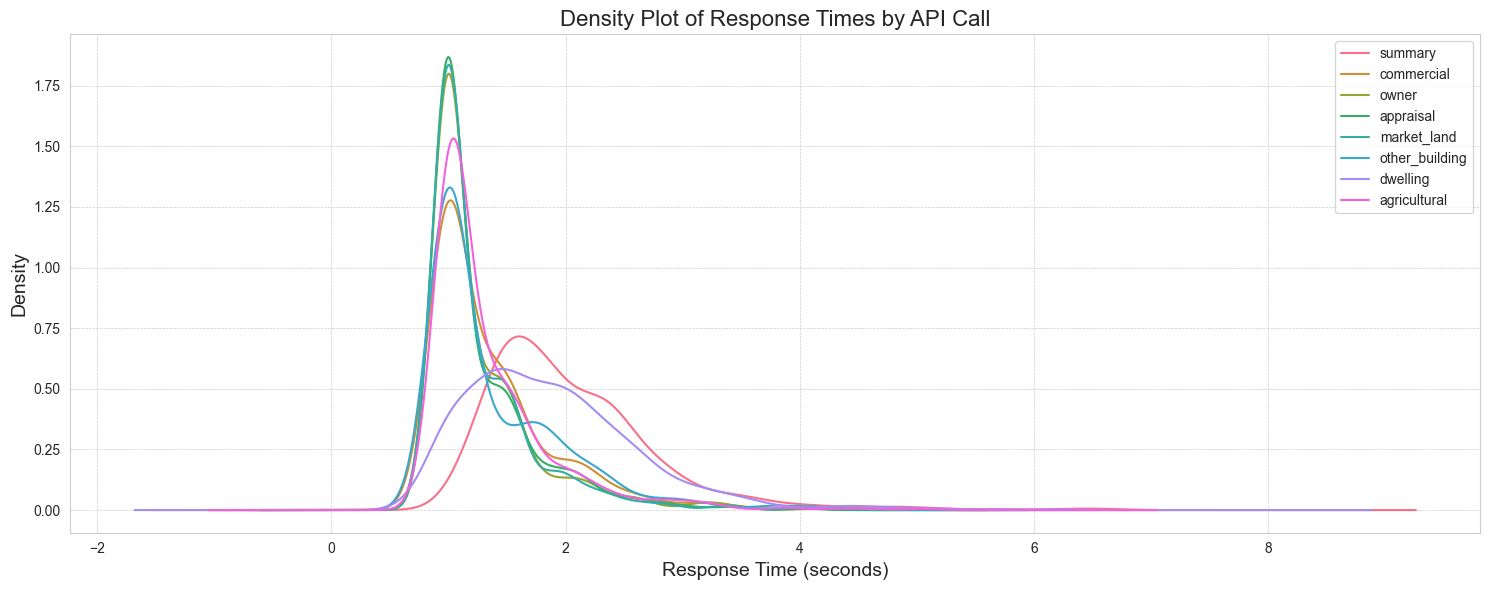

In [119]:
# Setting up a contrasting color palette
colors = sns.color_palette("husl", len(total_time_by_geocode.columns) - 2)  # -2 to exclude Geocode and total_time columns

plt.figure(figsize=(15, 6))

# Plotting density for each API call
for idx, column in enumerate(total_time_by_geocode.drop(columns=['Geocode', 'total_time']).columns):
    total_time_by_geocode[column].plot(kind='density', color=colors[idx], label=column)

plt.title('Density Plot of Response Times by API Call', fontsize=16)
plt.xlabel('Response Time (seconds)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# flatten the complete property data

In [122]:
import pandas as pd

def flatten_json_data(data: list) -> pd.DataFrame:
    """
    Flatten a list of dictionaries with nested lists and dictionaries.

    Args:
        data (list): A list of dictionaries with potential nested lists and dictionaries.

    Returns:
        pd.DataFrame: A flattened DataFrame representation of the data.
    """

    def flatten(item, prefix="", sep="__"):
        """
        Recursive function to flatten a dictionary.

        Args:
            item (Union[dict, list]): The current dictionary or list to flatten.
            prefix (str, optional): The current prefix for the flattened key. Defaults to "".
            sep (str, optional): The separator between flattened keys. Defaults to "__".

        Returns:
            dict: A flattened dictionary.
        """
        if isinstance(item, dict):
            return {prefix + sep + k if prefix else k: v
                    for kk, vv in item.items()
                    for k, v in flatten(vv, kk).items()}
        elif isinstance(item, list):
            return {prefix + sep + str(i) if prefix else str(i): v
                    for i, vv in enumerate(item)
                    for k, v in flatten(vv).items()}
        else:
            return {prefix: item}

    # Apply the flatten function to each dictionary in the data list
    flattened_data = [flatten(d) for d in data]

    # Convert the flattened data to a DataFrame and return it
    return pd.DataFrame(flattened_data)

# Usage
data = complete_property_data_list
flattened_df = flatten_json_data(data)
flattened_df.to_csv('flatten_complete_data.csv', index=False)